In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
import os
import os.path
from pathlib import Path
import glob

In [3]:
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

In [7]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose, LeakyReLU, GaussianNoise

In [9]:
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras

In [10]:
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [11]:
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [48]:
Wave_Train_Data = Path("C:/Users/K GIRISH/Downloads/archive/train")
Wave_Test_Data = Path("C:/Users/K GIRISH/Downloads/archive/test")
Wave_Validation_Data = Path("C:/Users/K GIRISH/Downloads/archive/validation")

In [49]:
Train_PNG_Path = list(Wave_Train_Data.glob(r"*/*.png"))
Test_PNG_Path = list(Wave_Test_Data.glob(r"*/*.png"))
Validation_PNG_Path = list(Wave_Validation_Data.glob(r"*/*.png"))

In [50]:
Train_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Train_PNG_Path))
Test_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_PNG_Path))
Validation_PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Validation_PNG_Path))

In [51]:
Train_PNG_Path_Series = pd.Series(Train_PNG_Path,name="PNG").astype(str)
Test_PNG_Path_Series = pd.Series(Test_PNG_Path,name="PNG").astype(str)
Validation_PNG_Path_Series = pd.Series(Validation_PNG_Path,name="PNG").astype(str)

In [52]:
Train_PNG_Labels_Series = pd.Series(Train_PNG_Labels,name="CATEGORY")
Test_PNG_Labels_Series = pd.Series(Test_PNG_Labels,name="CATEGORY")
Validation_PNG_Labels_Series = pd.Series(Validation_PNG_Labels,name="CATEGORY")

In [53]:
print(Train_PNG_Labels_Series.value_counts())
print("---"*20)
print(Train_PNG_Labels_Series.value_counts().sum())

Series([], Name: count, dtype: int64)
------------------------------------------------------------
0


In [21]:
print(Test_PNG_Labels_Series.value_counts())
print("---"*20)
print(Test_PNG_Labels_Series.value_counts().sum())

Series([], Name: count, dtype: int64)
------------------------------------------------------------
0


In [22]:
print(Validation_PNG_Labels_Series.value_counts())
print("---"*20)
print(Validation_PNG_Labels_Series.value_counts().sum())

Series([], Name: count, dtype: int64)
------------------------------------------------------------
0


In [23]:
Main_Train_Data = pd.concat([Train_PNG_Path_Series,Train_PNG_Labels_Series],axis=1)
Main_Test_Data = pd.concat([Test_PNG_Path_Series,Test_PNG_Labels_Series],axis=1)
Main_Validation_Data = pd.concat([Validation_PNG_Path_Series,Validation_PNG_Labels_Series],axis=1)

In [24]:
print(Main_Train_Data.head(-1))

Empty DataFrame
Columns: [PNG, CATEGORY]
Index: []


In [26]:
print(Main_Test_Data.head(-1))

Empty DataFrame
Columns: [PNG, CATEGORY]
Index: []


In [27]:
print(Main_Validation_Data.head(-1))

Empty DataFrame
Columns: [PNG, CATEGORY]
Index: []


In [28]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [29]:
print(Main_Train_Data.head(-1))

Empty DataFrame
Columns: [PNG, CATEGORY]
Index: []


In [30]:
Main_Test_Data = Main_Test_Data.sample(frac=1).reset_index(drop=True)

In [31]:
print(Main_Test_Data.head(-1))

Empty DataFrame
Columns: [PNG, CATEGORY]
Index: []


In [32]:
Main_Validation_Data = Main_Validation_Data.sample(frac=1).reset_index(drop=True)

In [33]:
print(Main_Validation_Data.head(-1))

Empty DataFrame
Columns: [PNG, CATEGORY]
Index: []


In [34]:
plt.style.use("classic")

In [35]:
example_IMG = cv2.imread(Main_Train_Data["PNG"][22033])
plt.xlabel(example_IMG.shape)
plt.ylabel(example_IMG.size)
plt.title(Main_Train_Data["CATEGORY"][22033])
plt.imshow(example_IMG)

KeyError: 22033

In [79]:
example_IMG = cv2.imread(Main_Train_Data["PNG"][23])
plt.xlabel(example_IMG.shape)
plt.ylabel(example_IMG.size)
plt.title(Main_Train_Data["CATEGORY"][23])
plt.imshow(example_IMG)

KeyError: 23

In [34]:
example_IMG = cv2.imread(Main_Train_Data["PNG"][1009])
plt.xlabel(example_IMG.shape)
plt.ylabel(example_IMG.size)
plt.title(Main_Train_Data["CATEGORY"][1009])
plt.imshow(example_IMG)

KeyError: 1009

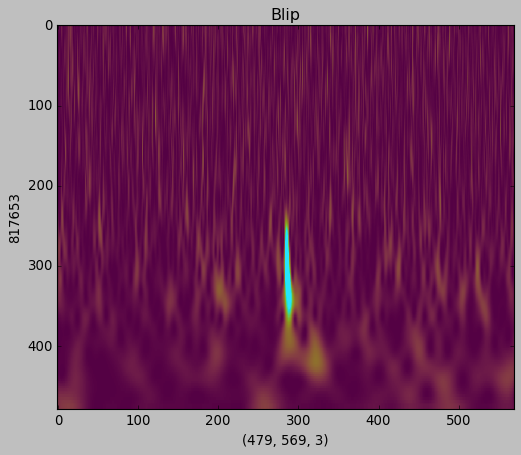

In [40]:
example_IMG = cv2.imread(Main_Train_Data["PNG"][101])
plt.xlabel(example_IMG.shape)
plt.ylabel(example_IMG.size)
plt.title(Main_Train_Data["CATEGORY"][101])
plt.imshow(example_IMG)

KeyError: 0

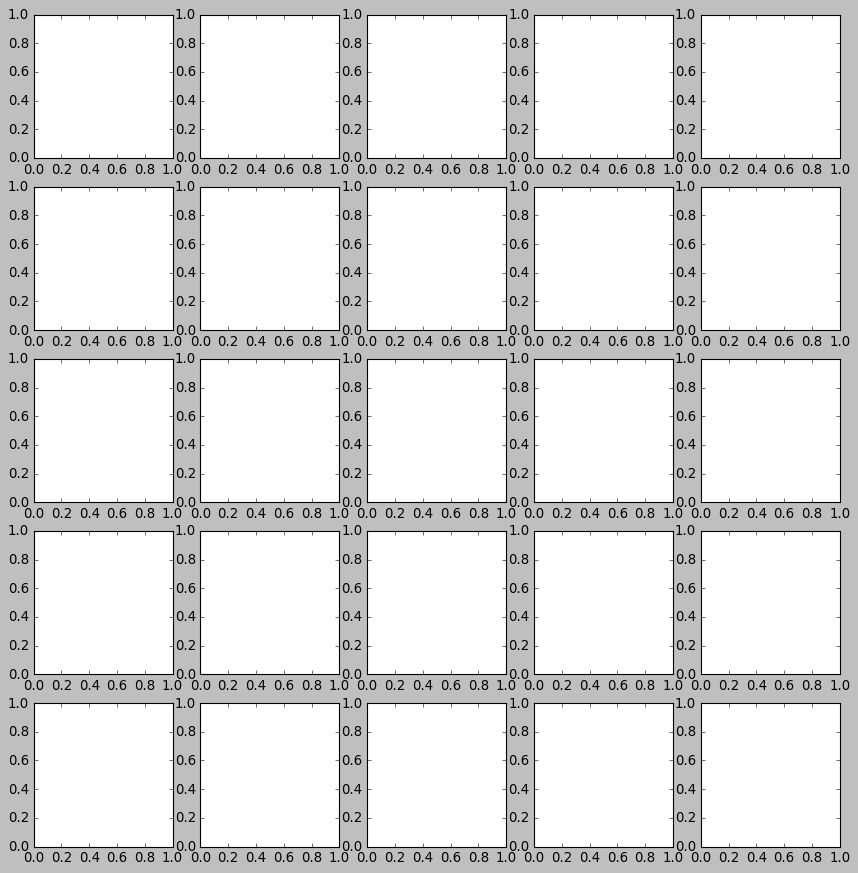

In [49]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = plt.imread(Main_Train_Data["PNG"][i])
    ax.imshow(IMG)
    ax.set_xlabel(IMG.shape)
    ax.set_ylabel(IMG.size)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

KeyError: 0

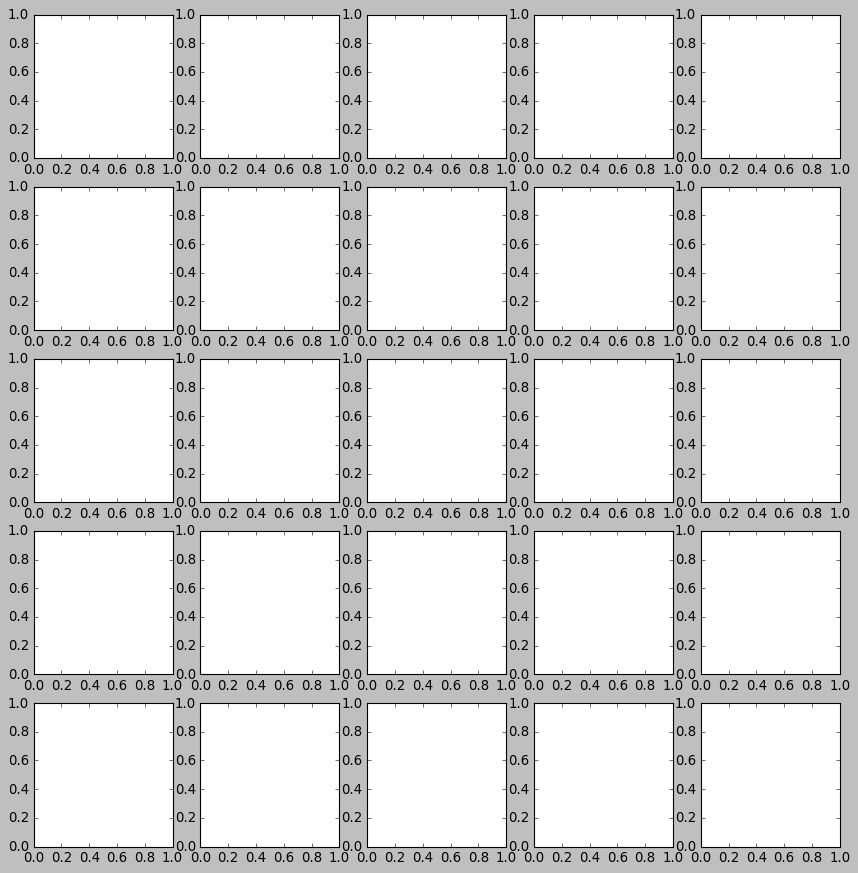

In [50]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(Main_Train_Data["PNG"][i])
    ax.imshow(IMG)
    ax.set_xlabel(round(np.mean(IMG)))
    ax.set_ylabel(IMG.shape)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

KeyError: 0

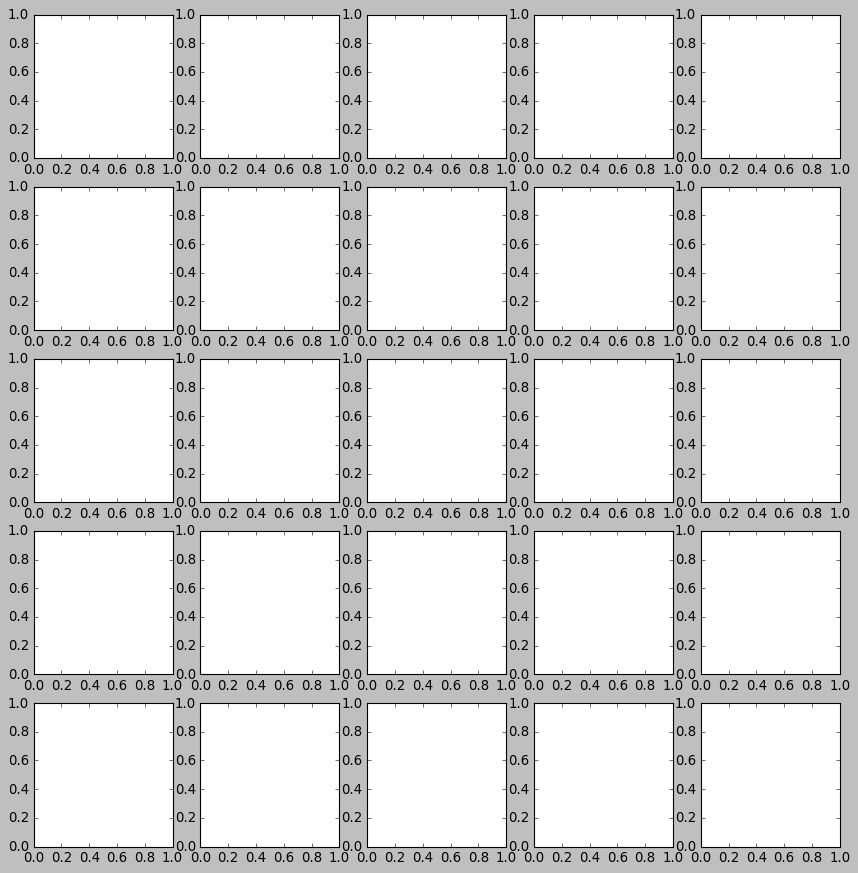

In [51]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(Main_Train_Data["PNG"][i])
    Canny_IMG = cv2.Canny(IMG,10,100)
    ax.imshow(Canny_IMG)
    ax.set_xlabel(Canny_IMG.shape)
    ax.set_ylabel(Canny_IMG.size)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

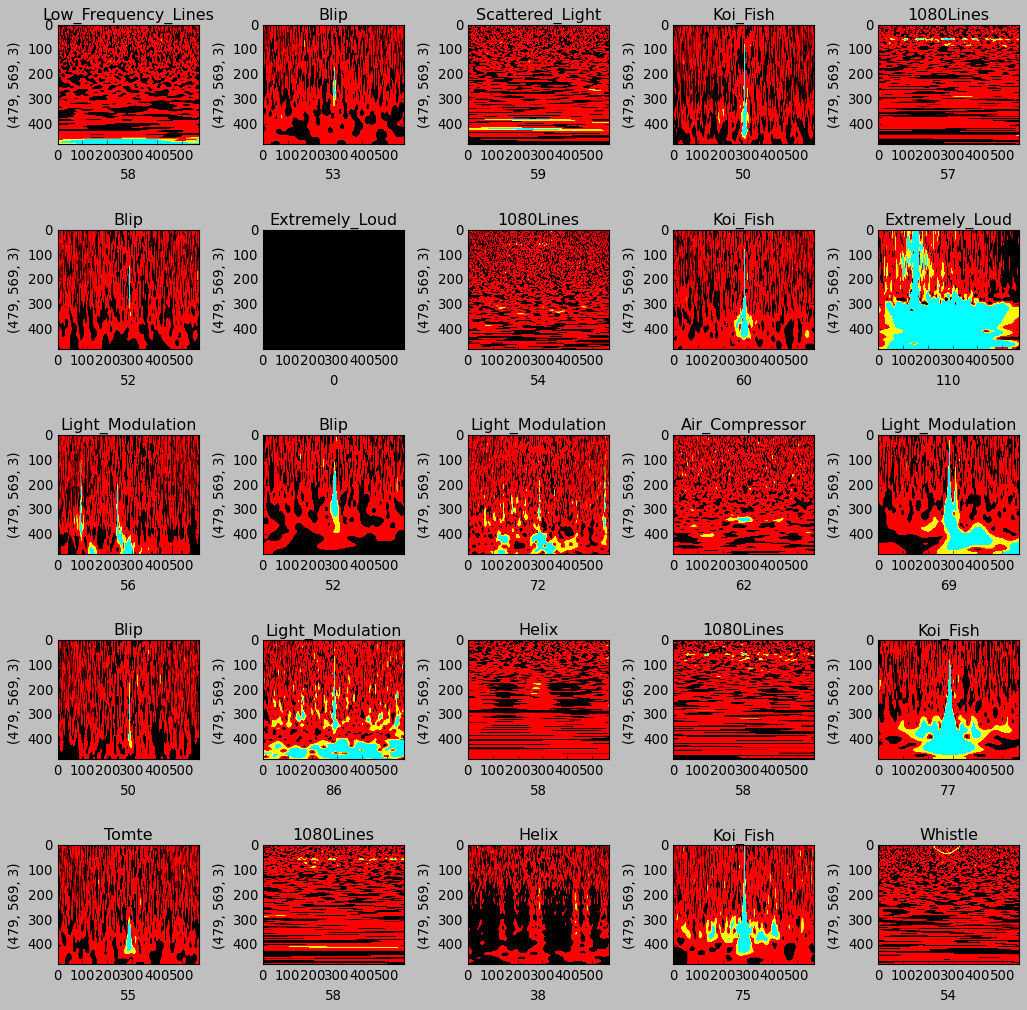

In [44]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(Main_Train_Data["PNG"][i])
    _,Threshold_IMG = cv2.threshold(IMG,90,255,cv2.THRESH_BINARY)
    ax.imshow(Threshold_IMG)
    ax.set_xlabel(round(np.mean(Threshold_IMG)))
    ax.set_ylabel(Threshold_IMG.shape)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

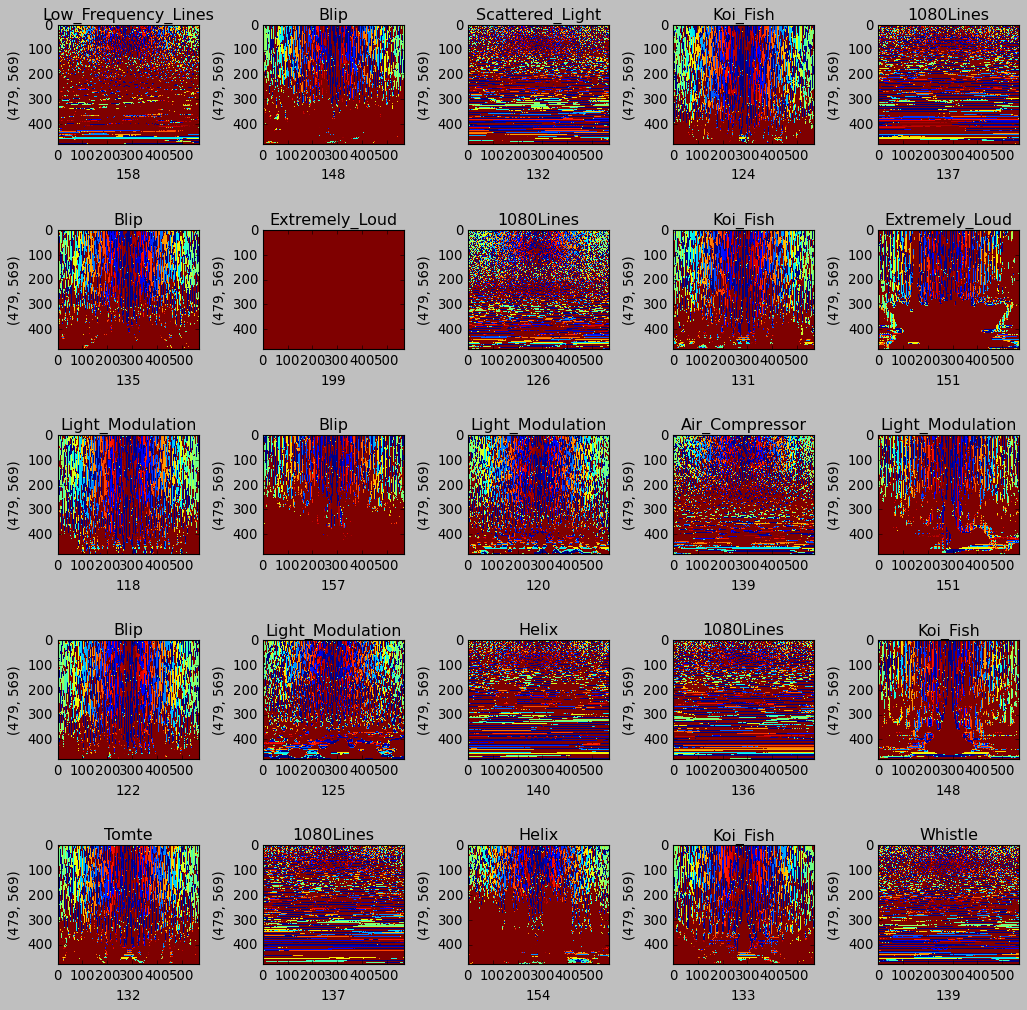

In [45]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(Main_Train_Data["PNG"][i],0)
    AdaptiveThreshold_IMG = cv2.adaptiveThreshold(IMG,200,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
    ax.imshow(AdaptiveThreshold_IMG)
    ax.set_xlabel(round(np.mean(AdaptiveThreshold_IMG)))
    ax.set_ylabel(AdaptiveThreshold_IMG.shape)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

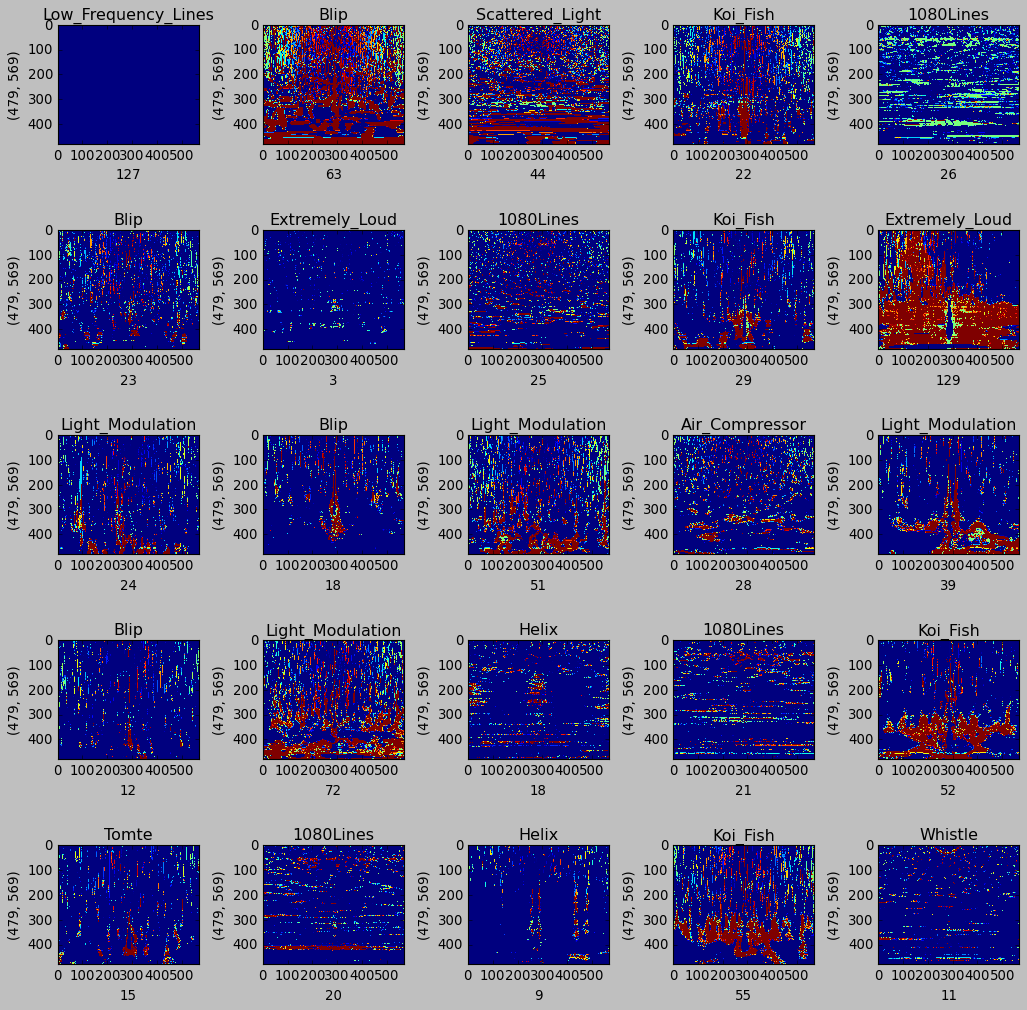

In [46]:
Background_SUB = cv2.createBackgroundSubtractorMOG2()

figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(Main_Train_Data["PNG"][i])
    SUB_IMG = Background_SUB.apply(IMG)
    ax.imshow(SUB_IMG)
    ax.set_xlabel(round(np.mean(SUB_IMG)))
    ax.set_ylabel(SUB_IMG.shape)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

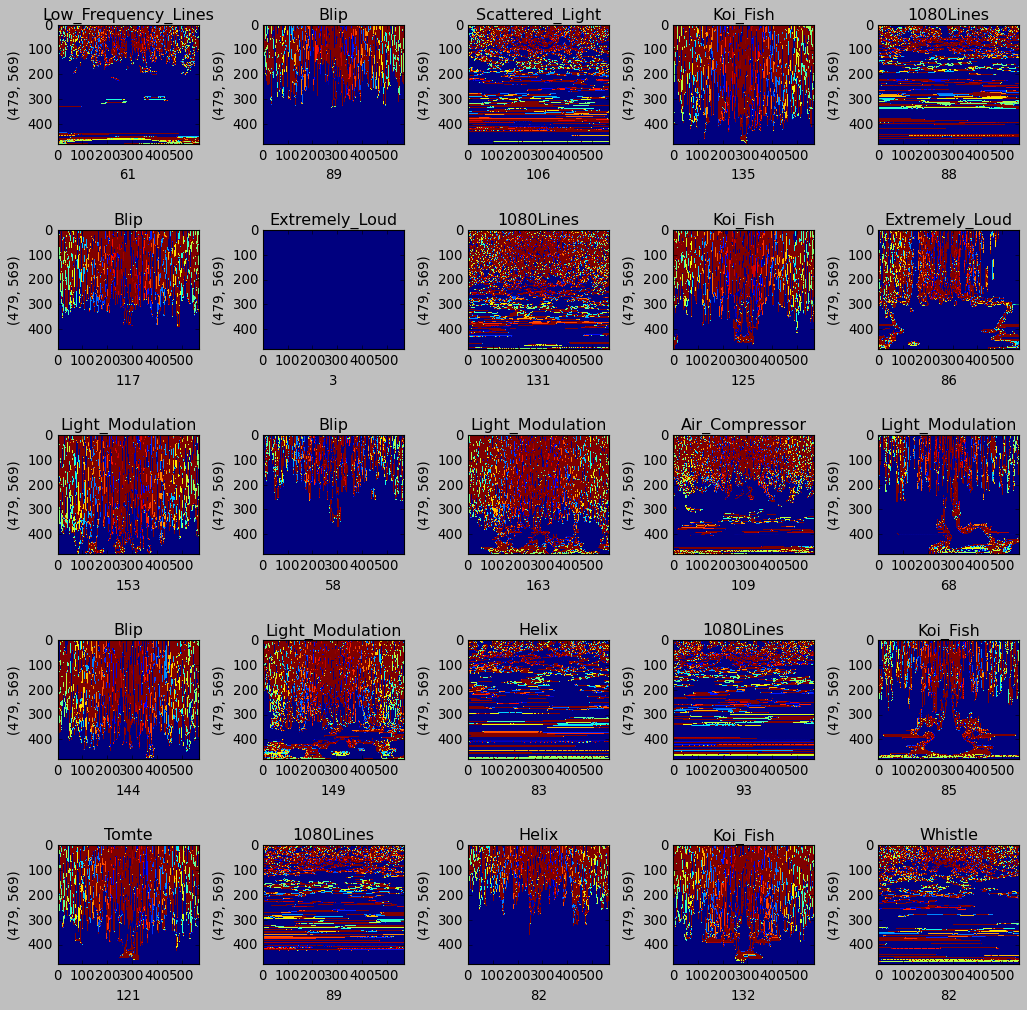

In [47]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(Main_Train_Data["PNG"][i])
    Canny_IMG = cv2.Canny(IMG,10,100)
    contour,_ = cv2.findContours(Canny_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    draw_contour = cv2.drawContours(Canny_IMG,contour,-1,(255,0,0),2)
    ax.imshow(draw_contour)
    ax.set_xlabel(round(np.mean(draw_contour)))
    ax.set_ylabel(draw_contour.shape)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

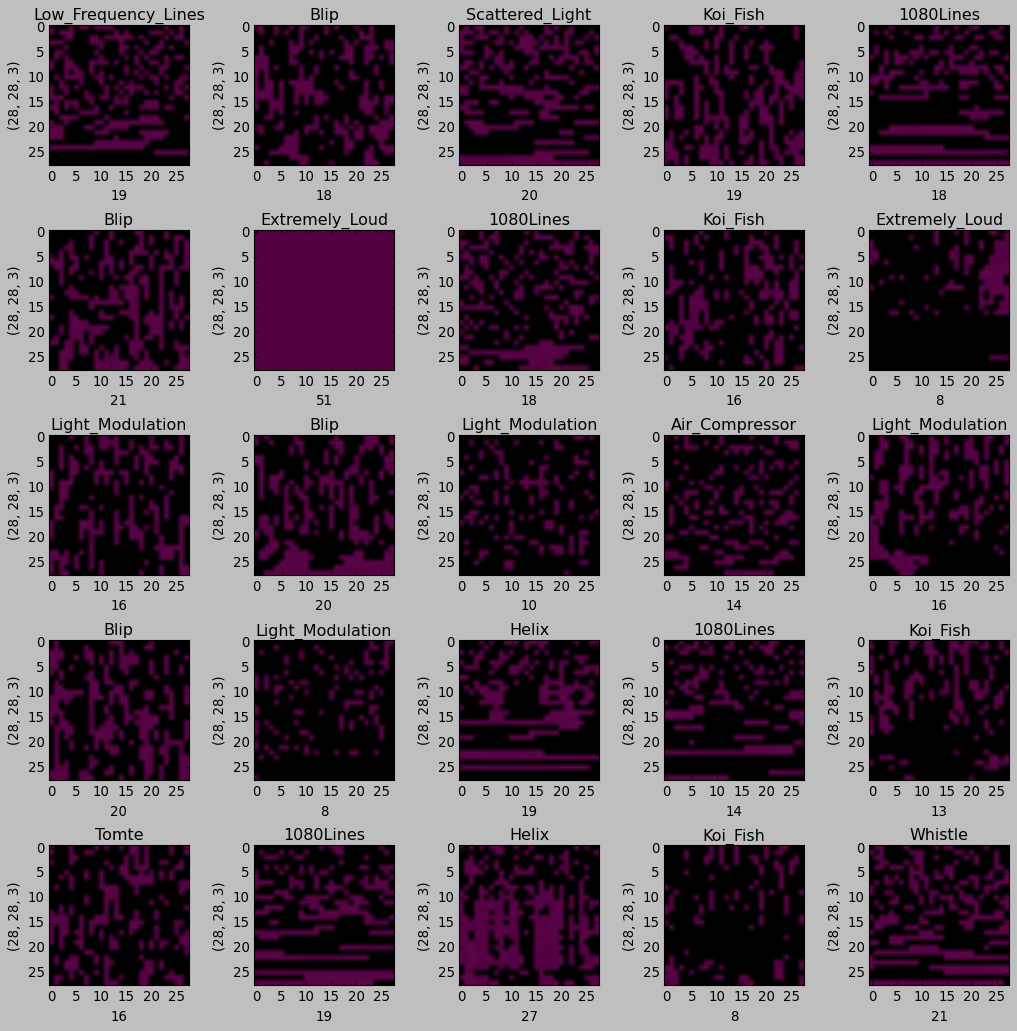

In [48]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(Main_Train_Data["PNG"][i])
    IMG = cv2.resize(IMG,(28,28))
    _,threshold_IMG = cv2.threshold(IMG,90,255,cv2.THRESH_BINARY_INV)
    threshold_IMG = cv2.resize(threshold_IMG,(28,28))
    mask = cv2.inRange(IMG,IMG,threshold_IMG)
    Sub_Mask = cv2.bitwise_and(IMG,IMG,mask=mask)
    ax.imshow(Sub_Mask)
    ax.set_xlabel(round(np.mean(Sub_Mask)))
    ax.set_ylabel(Sub_Mask.shape)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

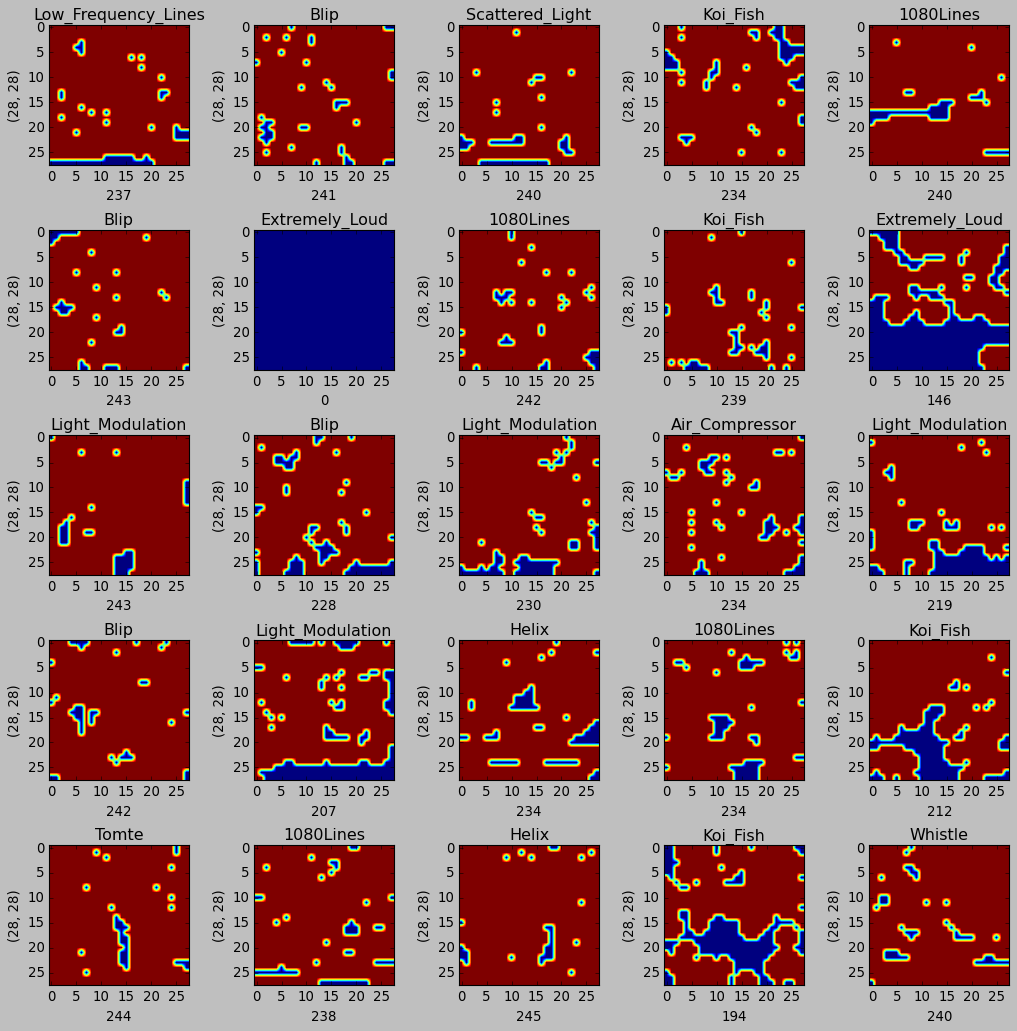

In [49]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(Main_Train_Data["PNG"][i])
    IMG = cv2.resize(IMG,(28,28))
    _,threshold_IMG = cv2.threshold(IMG,90,255,cv2.THRESH_BINARY_INV)
    threshold_IMG = cv2.resize(threshold_IMG,(28,28))
    mask = cv2.inRange(IMG,IMG,threshold_IMG)
    Sub_Mask = cv2.bitwise_and(IMG,IMG,mask=mask)
    Canny_IMG = cv2.Canny(Sub_Mask,10,100)
    contour,_ = cv2.findContours(Canny_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    draw_contour = cv2.drawContours(Canny_IMG,contour,-1,(255,0,0),2)
    ax.imshow(draw_contour)
    ax.set_xlabel(round(np.mean(draw_contour)))
    ax.set_ylabel(draw_contour.shape)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

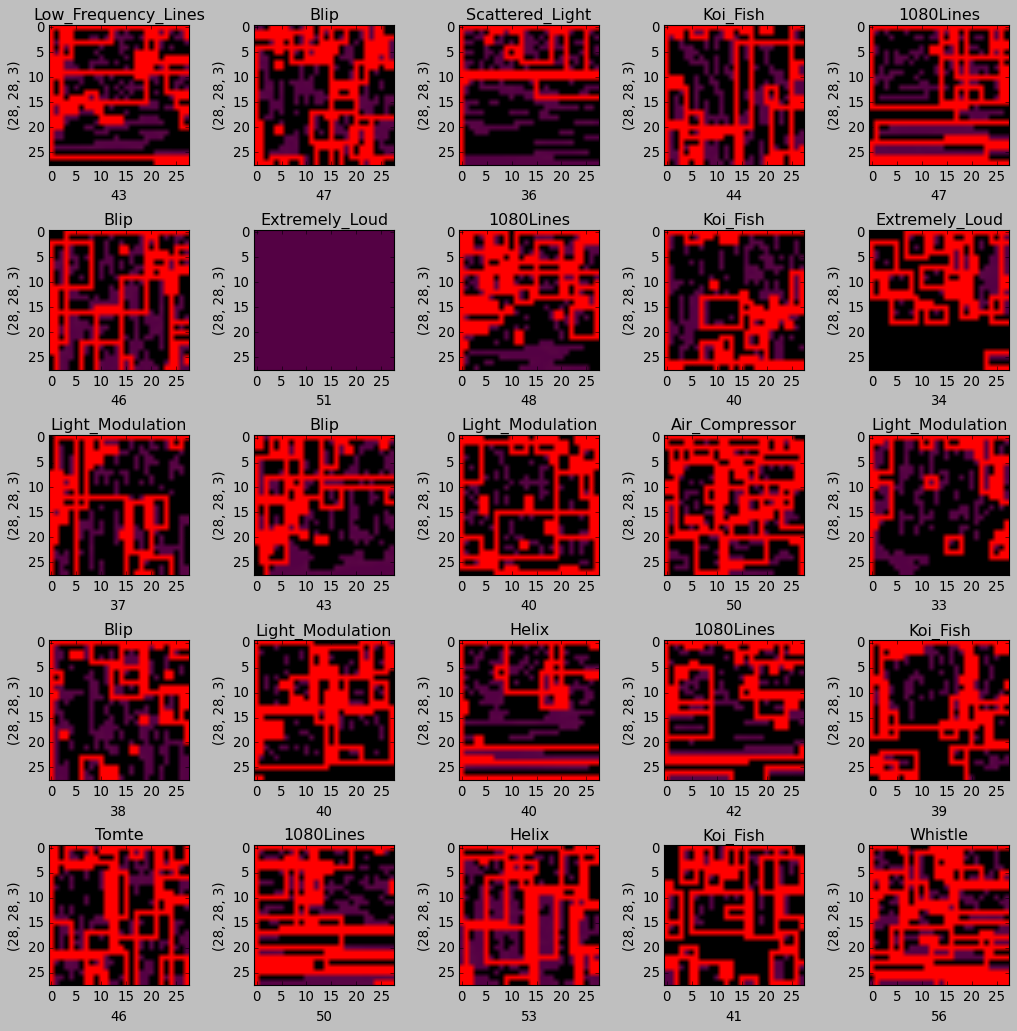

In [50]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(Main_Train_Data["PNG"][i])
    IMG = cv2.resize(IMG,(28,28))
    _,threshold_IMG = cv2.threshold(IMG,90,255,cv2.THRESH_BINARY_INV)
    threshold_IMG = cv2.resize(threshold_IMG,(28,28))
    mask = cv2.inRange(IMG,IMG,threshold_IMG)
    Sub_Mask = cv2.bitwise_and(IMG,IMG,mask=mask)
    Canny_IMG = cv2.Canny(Sub_Mask,10,100)
    contour,_ = cv2.findContours(Canny_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    
    for cnt in contour:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(Sub_Mask,(x,y),(x+w,y+h),(255,0,0),1)
        
    ax.imshow(Sub_Mask)
    ax.set_xlabel(round(np.mean(Sub_Mask)))
    ax.set_ylabel(Sub_Mask.shape)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

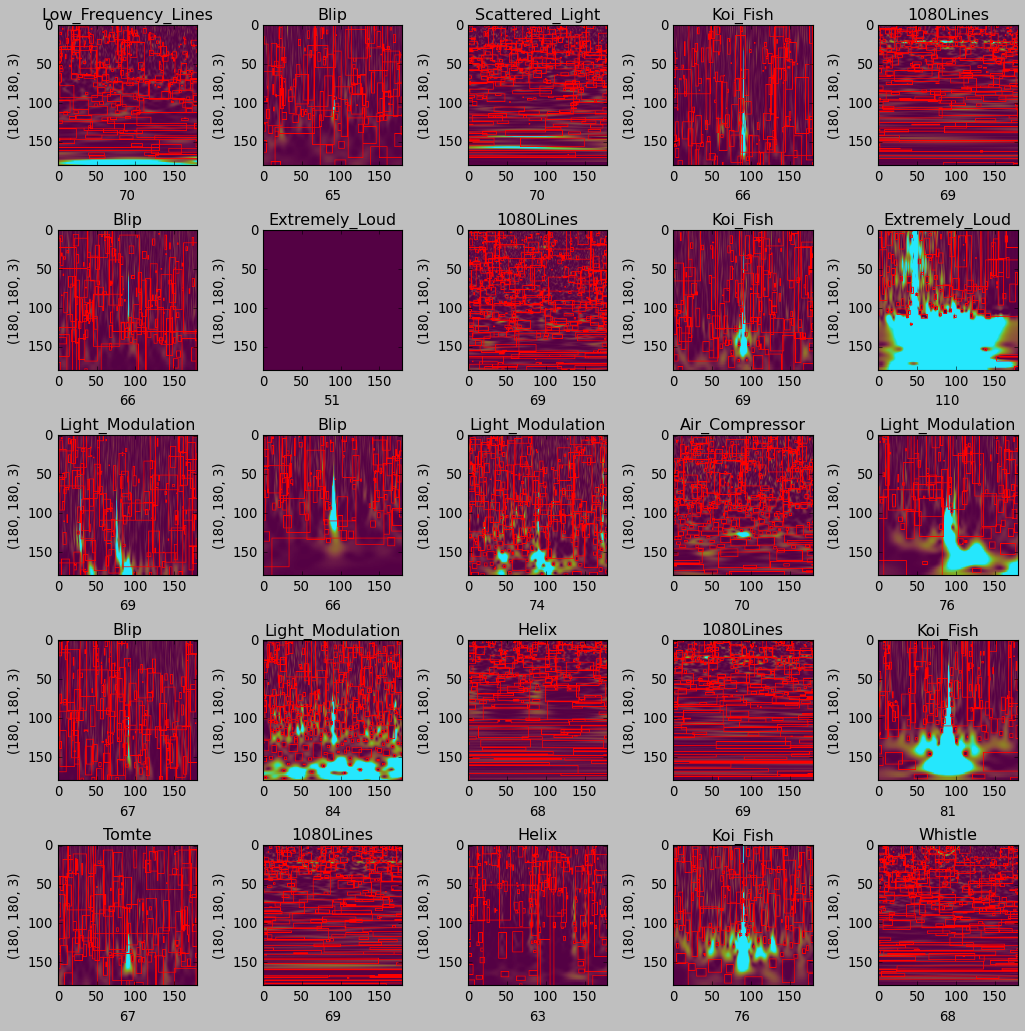

In [51]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(13,13))

for i,ax in enumerate(axis.flat):
    IMG = cv2.imread(Main_Train_Data["PNG"][i])
    IMG = cv2.resize(IMG,(180,180))
    _,threshold_IMG = cv2.threshold(IMG,90,255,cv2.THRESH_BINARY_INV)
    threshold_IMG = cv2.resize(threshold_IMG,(180,180))
    mask = cv2.inRange(IMG,IMG,threshold_IMG)
    Sub_Mask = cv2.bitwise_and(IMG,IMG,mask=mask)
    Canny_IMG = cv2.Canny(Sub_Mask,10,100)
    contour,_ = cv2.findContours(Canny_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    
    for cnt in contour:
        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(IMG,(x,y),(x+w,y+h),(255,0,0),1)
        
    ax.imshow(IMG)
    ax.set_xlabel(round(np.mean(IMG)))
    ax.set_ylabel(IMG.shape)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

In [52]:
Y_Validation_Data = Train_PNG_Path[5000:10000]

In [53]:
Y_Validation_Data_Series = pd.Series(Y_Validation_Data,name="PNG").astype(str)

In [54]:
print(Y_Validation_Data_Series.shape)

(5000,)


In [55]:
X_Training_Data = Train_PNG_Path[:5000]

In [56]:
X_Training_Data_Series = pd.Series(X_Training_Data,name="PNG").astype(str)

In [57]:
print(X_Training_Data_Series.shape)

(5000,)


In [58]:
Transformated_X = []

for IMG_X in X_Training_Data_Series:
    X_IMG = cv2.imread(IMG_X)
    X_IMG = X_IMG / 255.
    R_IMG = cv2.resize(X_IMG,(28,28))
    Transformated_X.append(R_IMG)

In [ ]:
Transformated_Y = []

for IMG_Y in Y_Validation_Data_Series:
    Y_IMG = cv2.imread(IMG_Y)
    Y_IMG = Y_IMG / 255.
    RY_IMG = cv2.resize(Y_IMG,(28,28))
    Transformated_Y.append(RY_IMG)

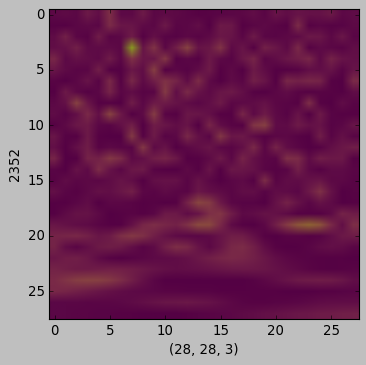

In [ ]:
figure = plt.figure(figsize=(5,5))
plt.xlabel(Transformated_X[2].shape)
plt.ylabel(Transformated_X[2].size)
plt.imshow(Transformated_X[2])

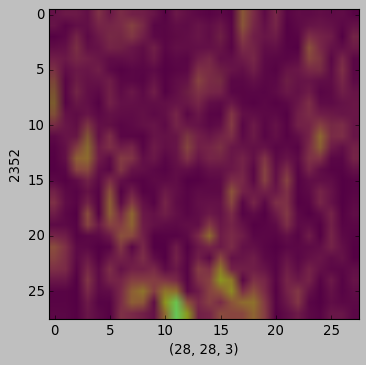

In [ ]:
figure = plt.figure(figsize=(5,5))
plt.xlabel(Transformated_Y[2].shape)
plt.ylabel(Transformated_Y[2].size)
plt.imshow(Transformated_Y[2])

In [ ]:
X_Train = np.array(Transformated_X)
Y_Train = np.array(Transformated_Y)

In [ ]:
print(X_Train.shape)

(5000, 28, 28, 3)


In [ ]:
print(Y_Train.shape)

(5000, 28, 28, 3)


In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28,3]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(300,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(75,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [ ]:
print(encoder.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2352)              0         
                                                                 
 dense_14 (Dense)            (None, 400)               941200    
                                                                 
 dense_15 (Dense)            (None, 300)               120300    
                                                                 
 dense_16 (Dense)            (None, 200)               60200     
                                                                 
 dense_17 (Dense)            (None, 100)               20100     
                                                                 
 dense_18 (Dense)            (None, 75)                7575      
                                                                 
 dense_19 (Dense)            (None, 50)               

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation="relu"))
decoder.add(Dense(75,activation="relu"))
decoder.add(Dense(100,activation="relu"))
decoder.add(Dense(200,activation="relu"))
decoder.add(Dense(300,activation="relu"))
decoder.add(Dense(400,activation="relu"))
decoder.add(Dense(2352,activation="sigmoid"))
decoder.add(Reshape([28,28,3]))

In [ ]:
print(decoder.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 50)                1300      
                                                                 
 dense_36 (Dense)            (None, 75)                3825      
                                                                 
 dense_37 (Dense)            (None, 100)               7600      
                                                                 
 dense_38 (Dense)            (None, 200)               20200     
                                                                 
 dense_39 (Dense)            (None, 300)               60300     
                                                                 
 dense_40 (Dense)            (None, 400)               120400    
                                                                 
 dense_41 (Dense)            (None, 2352)             

In [ ]:
Auto_Encoder = Sequential([encoder,decoder])

In [ ]:
print(Auto_Encoder.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 25)                1154450   
                                                                 
 sequential_5 (Sequential)   (None, 28, 28, 3)         1156777   
                                                                 
Total params: 2311227 (8.82 MB)
Trainable params: 2311227 (8.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
Auto_Encoder.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
Auto_Encoder.fit(X_Train,X_Train,validation_data=(Y_Train,Y_Train),epochs=10)

Epoch 1/10
157/157 [==============================] - 5s 34ms/step - loss: 0.4991 - accuracy: 0.9966 - val_loss: 0.5284 - val_accuracy: 0.9350
Epoch 2/10
157/157 [==============================] - 5s 30ms/step - loss: 0.4990 - accuracy: 0.9966 - val_loss: 0.5270 - val_accuracy: 0.9351
Epoch 3/10
157/157 [==============================] - 4s 26ms/step - loss: 0.4991 - accuracy: 0.9966 - val_loss: 0.5303 - val_accuracy: 0.9347
Epoch 4/10
157/157 [==============================] - 4s 27ms/step - loss: 0.4988 - accuracy: 0.9966 - val_loss: 0.5289 - val_accuracy: 0.9352
Epoch 5/10
157/157 [==============================] - 4s 27ms/step - loss: 0.4988 - accuracy: 0.9967 - val_loss: 0.5282 - val_accuracy: 0.9350
Epoch 6/10
157/157 [==============================] - 4s 27ms/step - loss: 0.4987 - accuracy: 0.9968 - val_loss: 0.5278 - val_accuracy: 0.9356
Epoch 7/10
157/157 [==============================] - 4s 28ms/step - loss: 0.4986 - accuracy: 0.9968 - val_loss: 0.5287 - val_accuracy: 0.9350

In [ ]:
Predict_IMG = Auto_Encoder.predict(Y_Train[:10])

1/1 [==============================] - 0s 320ms/step


In [ ]:
print(Y_Train[:10].shape)

(10, 28, 28, 3)


In [ ]:
print(Predict_IMG[1].shape)

(28, 28, 3)


NORMAL


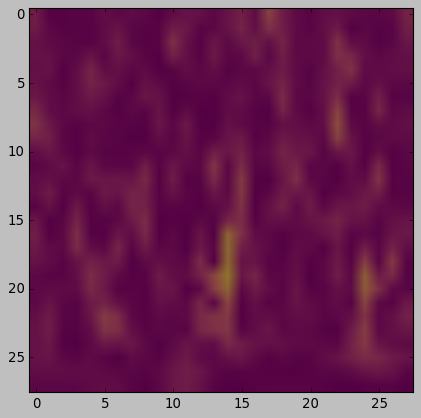

Auto Encoder


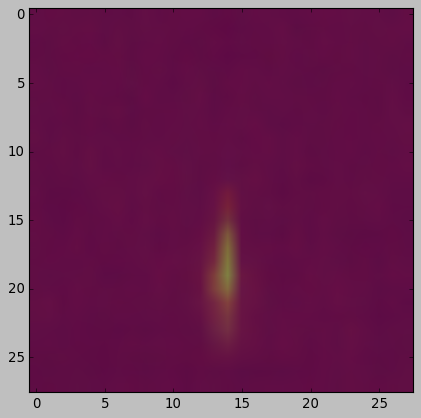

In [ ]:
prediction_img = 5
print("NORMAL")
plt.imshow(Y_Train[prediction_img])
plt.show()
print("Auto Encoder")
plt.imshow(Predict_IMG[prediction_img])

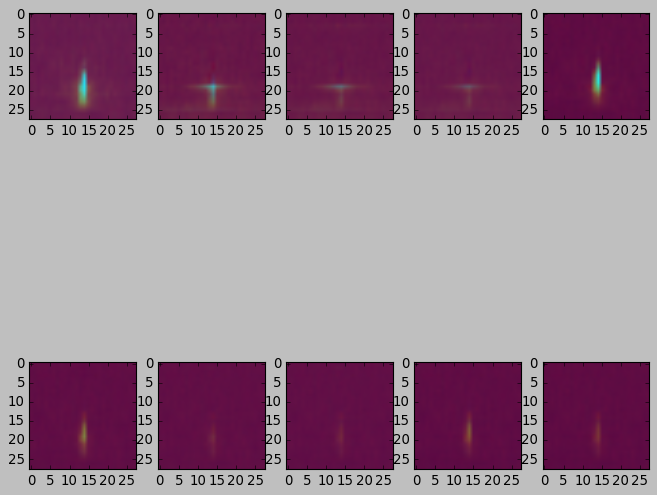

In [ ]:
figure,axis = plt.subplots(nrows=2,ncols=5,figsize=(10,10))

for P_Image,ax in enumerate(axis.flat):
    ax.imshow(Predict_IMG[P_Image])

In [ ]:
Non_Seen_IMG = Main_Train_Data["PNG"][20000]
IMG_T = cv2.imread(Non_Seen_IMG)
IMG_T = IMG_T / 255.
IMG_T = cv2.resize(IMG_T,(28,28))

In [ ]:
IMG_T = np.array(IMG_T)

In [ ]:
IMG_T = IMG_T.reshape(-1,28,28,3)

In [ ]:
print(IMG_T.shape)

(1, 28, 28, 3)


In [ ]:
Pre_Non_Seen = Auto_Encoder.predict(IMG_T)

1/1 [==============================] - 0s 52ms/step


NORMAL


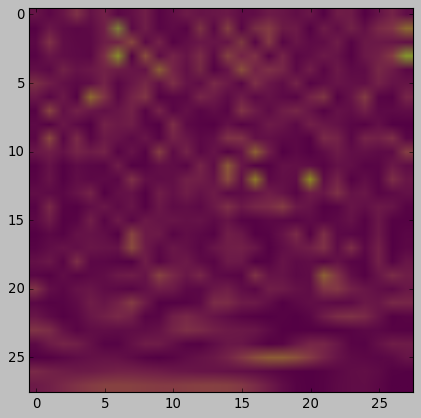

Auto Encoder


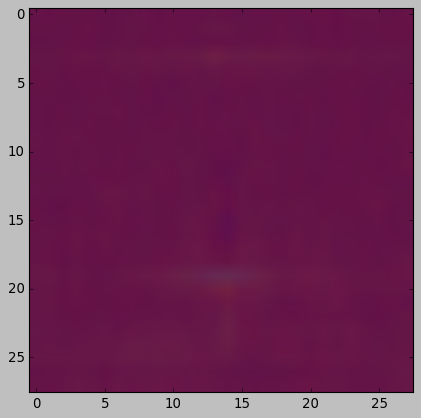

In [ ]:
print("NORMAL")
plt.imshow(IMG_T[0])
plt.show()
print("Auto Encoder")
plt.imshow(Pre_Non_Seen[0])

In [ ]:
Generator_Input = keras.Input(shape=(28,))
x = layers.Dense(128*14*14)(Generator_Input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((14,14,128))(x)

x = layers.Conv2D(256,5,padding="same")(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256,4,padding="same",strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256,5,padding="same")(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256,4,padding="same")(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256,3,padding="same")(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(3,7,padding="same",activation="tanh")(x)

Generator = keras.models.Model(Generator_Input,x)

In [ ]:
Discriminator_Input = layers.Input(shape=(28,28,3))
x = layers.Conv2D(128,3)(Discriminator_Input)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,4)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128,4)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128,3)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,3)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

x = layers.Dense(1,activation="sigmoid")(x)

Discriminator = keras.models.Model(Discriminator_Input,x)

In [ ]:
Discriminator.compile(optimizer=RMSprop(lr=0.0004,clipvalue=1.0),loss="binary_crossentropy")

In [ ]:
Discriminator.trainable = False

Gan_Input = keras.Input(shape=(28,))
Gan_Output = Discriminator(Generator(Gan_Input))
GAN_Model = keras.models.Model(Gan_Input,Gan_Output)

In [ ]:
GAN_Model.compile(optimizer=RMSprop(lr=0.0004,clipvalue=1.0),loss="binary_crossentropy")

In [ ]:
os.mkdir("wave8_new")

In [ ]:
start = 0
batch_size = 32
iterations = 10000
dim_size = 28

for step in range(iterations):
    random_noise_vector = np.random.normal(size=(batch_size,dim_size)) #32
    generation_images = Generator.predict(random_noise_vector)
    
    stop = start + batch_size
    real_images = X_Train[start:stop]
    
    combined_images = np.concatenate([generation_images,real_images])
    
    labels = np.concatenate([np.ones((batch_size,1)),np.zeros((batch_size,1))])
    labels += 0.05 * np.random.random(labels.shape)
    
    D_loss = Discriminator.train_on_batch(combined_images,labels)
    
    random_noise_vector = np.random.normal(size=(batch_size,dim_size)) #32
    
    misleading_targets = np.zeros((batch_size,1))
    
    a_loss = GAN_Model.train_on_batch(random_noise_vector,misleading_targets)
    
    start += batch_size
    
    if start > len(X_Train) - batch_size:
        start = 0
    
    if step % 100 == 0:
        GAN_Model.save_weights("GAN_ONE.h5")
        
        print("DISC_LOSS: ", D_loss)
        print("ADVERSARIAL_LOSS: ", a_loss)
        
        Img = image.array_to_img(generation_images[0] * 255.,scale=False)
        Img.save(os.path.join("./wave8_new","FAKE"+str(step)+".png"))
        
        Img = image.array_to_img(real_images[0] * 255.,scale=False)
        Img.save(os.path.join("./wave8_new","REAL"+str(step)+".png"))


1/1 [==============================] - 1s 608ms/step
DISC_LOSS:  -28694400.0
ADVERSARIAL_LOSS:  2876072192.0
1/1 [==============================] - 1s 553ms/step
DISC_LOSS:  -3627301.5
ADVERSARIAL_LOSS:  202021872.0
1/1 [==============================] - 1s 517ms/step
DISC_LOSS:  -525083008.0
ADVERSARIAL_LOSS:  48191426560.0
1/1 [==============================] - 1s 528ms/step


KeyboardInterrupt: 

In [ ]:
Exp_output = Path("./wave8_new")

In [ ]:
list_output = list(Exp_output.glob(r"*.png"))

In [ ]:
list_output_series = pd.Series(list_output,name="PNG").astype(str)

In [ ]:
noise_PR = tf.random.normal(shape=[10,28])

In [ ]:
print(noise_PR.shape)

(10, 28)


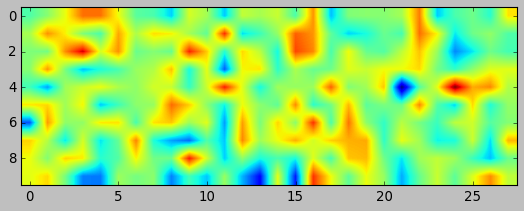

In [ ]:
plt.imshow(noise_PR)

In [ ]:
PR_Images = Generator(noise_PR)

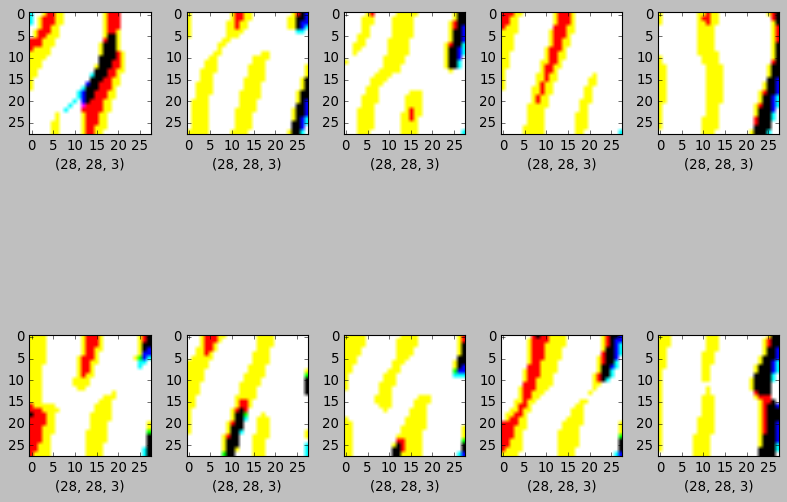

In [ ]:
figure, axes = plt.subplots(nrows=2,ncols=5,figsize=(10,10))

for i,ax in enumerate(axes.flat):
    ax.imshow(PR_Images[i],cmap="Greys_r")
    ax.set_xlabel(PR_Images[i].shape)
plt.tight_layout()
plt.show()

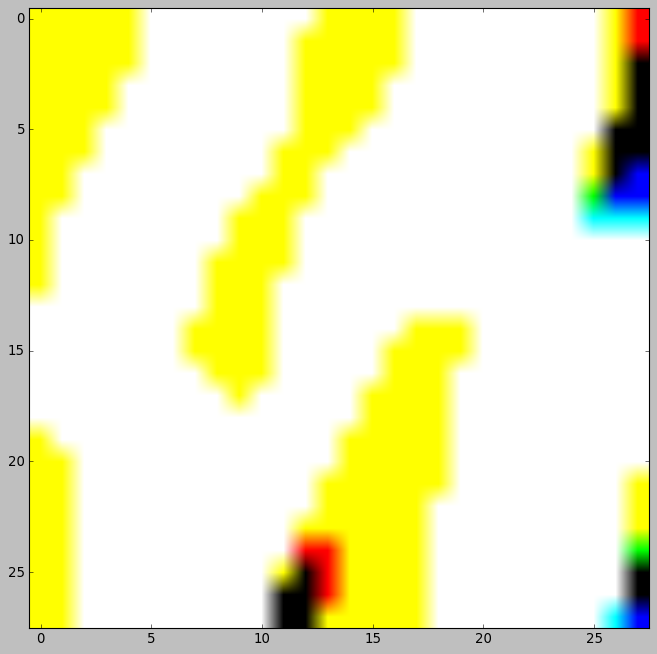

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(PR_Images[7])